In [2]:
import numpy as np
import plotly.express as px

In [3]:
f = open("h.txt", "r", encoding="utf-8")

d = []

x = np.linspace(0,3.4, 31)
y = np.linspace(0,9.4, 11)

x, y = np.meshgrid(x, y)

for line in f:
    data = line.split()
    d.append([])
    for i in data:
        d[-1].append(float(i))

d = np.array(d)

f.close()

d = abs(0.6-0.25-d)

x = np.linspace(start=0, stop=10, num=31)
y = np.flip(np.linspace(start=0, stop=3.5, num=11))
title = 'Распределение МПР'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title)
fig2 = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title, width=650)
fig.show()
fig2.show()

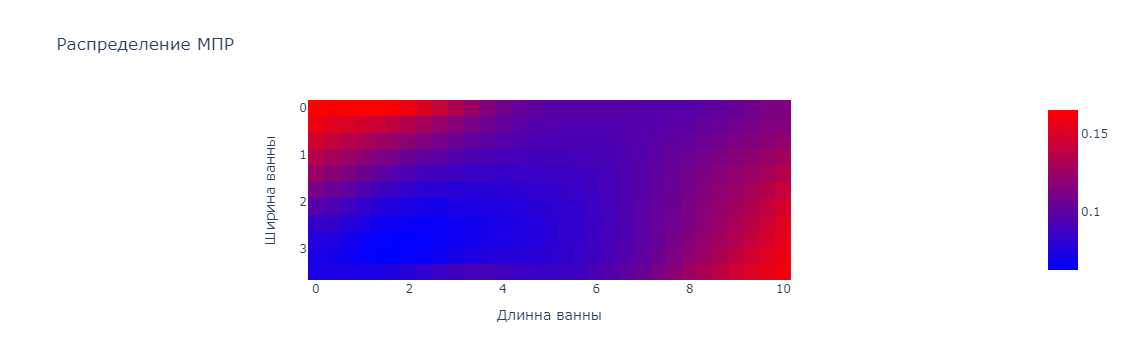

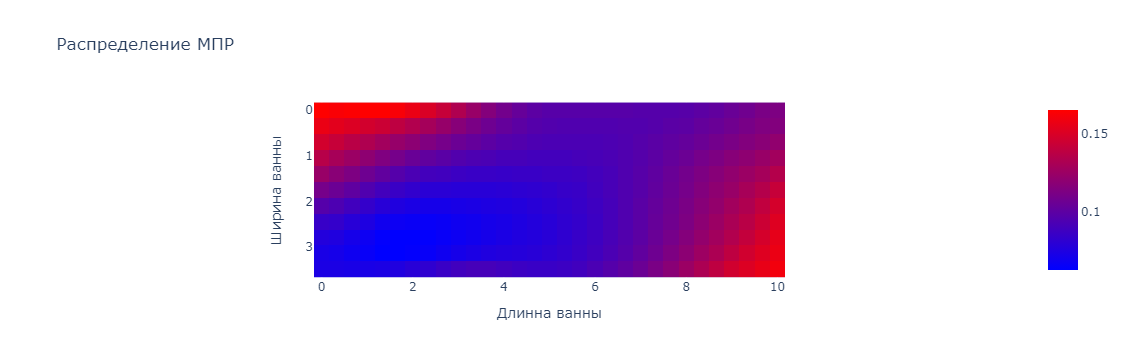

In [16]:
x = np.linspace(start=0, stop=10, num=31)
y = np.flip(np.linspace(start=0, stop=3.5, num=11))
title = 'Распределение МПР'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title)
fig2 = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title, width=650)
fig.show()
fig2.show()

In [6]:
import numpy as np
import plotly.express as px

class Grid():
    """A class that stores triangles and their order in a grid"""

    def __init__(self, x, y, z):
        self.triangles = []
        for i1 in range(len(x)-1):
            for i2 in range(len(y)-1):
                self.triangles.append([])
                self.triangles[-1].append(Triangle([x[i1], y[i2], z[i1][i2]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]]))
                self.triangles[-1].append(Triangle([x[i1+1], y[i2+1], z[i1+1][i2+1]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]]))

    def integral(self):
        """Calculating the integral sum for all triangles"""
        sum = 0
        array = []
        for square in self.triangles:
            for triangle in square:
                sum += triangle.intpart()
                array.append(triangle.intpart())
        eta_0 = 0.98
        #Squ = 15.8792448
        Squ = 17.5
        dot = [7,30]
        dot[0] = dot[0]-1
        dot[1] = dot[1]-1
        array = (1-eta_0)/Squ*np.array(array)
        return array
#        return (1-eta_0)*(0.6-anod-z[dot[0]][dot[1]])/Squ*sum
        return (1-eta_0)/Squ*sum

    def square(self):
        """Calculating the surface area"""
        sum = 0
        for square in self.triangles:
            for triangle in square:
                sum += triangle.squarepart()
        return sum


class Triangle():
    '''the class containing the corner points of a triangle,
    its area and the corresponding value of the function'''

    def __init__(self, dot1, dot2, dot3):
        self.a = np.array(dot1)
        self.b = np.array(dot2)
        self.c = np.array(dot3)

    def square(self):
        return np.linalg.norm(np.cross(self.a-self.b, self.a-self.c))/2

    def function(self):
        return ((f(self.a[2])+f(self.b[2])+f(self.c[2]))/3)

    def intpart(self):
        return self.square()*self.function()
    
    def squarepart(self):
        return self.square()

    def print(self):
        print(self.a, self.b, self.c)


def f(h):
    '''integral function'''
    return ((0.6-anod)-h)/h
    #return 1/h


file_name="anodeffect.txt"
anod = 0


file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

#x = np.linspace(0, 3.4, lenx)
#y = np.linspace(0, 9.4, leny)

#x = np.linspace(0, 2, lenx)
#y = np.linspace(0, 5, leny)

x = np.linspace(0, 10, lenx)
y = np.linspace(0, 3.5, leny)

z = []

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
    data_line = line.split()
    for i in range(len(data_line)):
        data_line[i] = float(data_line[i])
    data.append(data_line)

h = data

file.close()


for i1 in range(len(x)):
    z.append([])
    for i2 in range(len(y)):
        z[-1].append(h[i1][i2])


grid = Grid(x, y, z)
x = np.outer(x, np.ones(len(y)))
y = np.outer(y, np.ones(len(x))).T
z = np.array(z)
zero = np.zeros(z.shape)

arr = grid.integral()
d = np.reshape(arr, [(lenx-1), (leny-1)*2])

x = np.linspace(start=0, stop=10, num=(leny-1)*2)
y = np.flip(np.linspace(start=0, stop=3.5, num=(lenx-1)))
title = 'Распределение потерь по току'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig = px.imshow(d,x=x[::-1], y=y, color_continuous_scale='bluered', labels=labels, title=title, width=650)
fig.show()

In [3]:
file_name="surf1.txt"
anod = 0


file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

#x = np.linspace(0, 3.4, lenx)
#y = np.linspace(0, 9.4, leny)

#x = np.linspace(0, 2, lenx)
#y = np.linspace(0, 5, leny)

x = np.linspace(0, 10, lenx)
y = np.linspace(0, 3.5, leny)

z = []

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
    data_line = line.split()
    for i in range(len(data_line)):
        data_line[i] = float(data_line[i])
    data.append(data_line)

h = data

file.close()


for i1 in range(len(x)):
    z.append([])
    for i2 in range(len(y)):
        z[-1].append(h[i1][i2])

z = np.array(z)
d = 0.6-z-0.25

x = np.linspace(start=0, stop=10, num=(leny-1)*2)
y = np.flip(np.linspace(start=0, stop=3.5, num=(lenx-1)))
title = 'Распределение потерь по току'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
print(z.shape, x.size,  y.size)
fig = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title, width=650)
fig.show()

(40, 11) 20 39


ValueError: The length of the y vector must match the length of the first dimension of the img matrix.

In [28]:
f = open("surf1.txt", "r", encoding="utf-8")

d = []

x = np.linspace(0,3.4, 31)
y = np.linspace(0,9.4, 11)

x, y = np.meshgrid(x, y)

for line in f:
    data = line.split()
    d.append([])
    for i in data:
        d[-1].append(float(i))

d = np.array(d)

f.close()

d = abs(0.6-0.25-d)

x = np.linspace(start=0, stop=10, num=31)
y = np.flip(np.linspace(start=0, stop=3.5, num=11))
title = 'Распределение МПР'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig2 = px.imshow(d,x=x, y=y, color_continuous_scale='bluered', labels=labels, title=title, width=650)
fig2.show()

ValueError: The length of the y vector must match the length of the first dimension of the img matrix.